In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ratings = pd.read_csv("Data/title_ratings_cleaned.gz", index_col = False, usecols = ["tconst", "averageRating"])
movieLenghts = pd.read_csv("Data/title_basics_for_ratings_analysis.gz", index_col = False, usecols = ["tconst", "runtimeMinutes"])

In [3]:
merged = pd.merge(ratings, movieLenghts, on = "tconst")
merged = merged.dropna()
merged = merged.reset_index(drop=True)
merged

,tconst,averageRating,runtimeMinutes
0,tt0000009,5.9,45.0
1,tt0000147,5.2,20.0
2,tt0000502,3.8,100.0
3,tt0000574,6.1,70.0
4,tt0000679,5.2,120.0
...,...,...,...
224190,tt9914644,8.4,120.0
224191,tt9914942,6.8,74.0
224192,tt9916132,3.6,94.0
224193,tt9916160,6.6,72.0


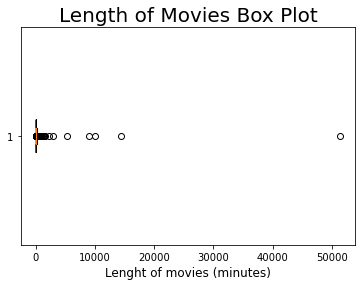

In [4]:
plt.boxplot(merged.runtimeMinutes, notch=True, vert=False)
plt.title("Length of Movies Box Plot", fontsize=20)
plt.xlabel("Lenght of movies (minutes)", fontsize=12)
plt.show()

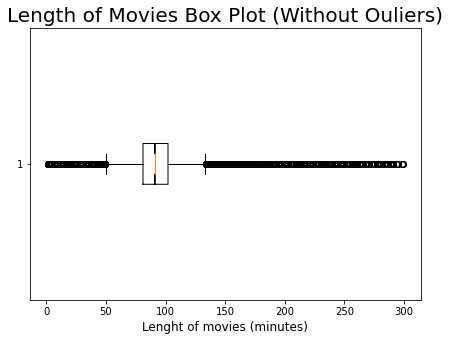

In [5]:
merged = merged[merged["runtimeMinutes"] < 300]
merged = merged.reset_index(drop=True)
plt.figure(figsize=(7, 5))
plt.boxplot(merged["runtimeMinutes"], notch=True, vert=False)
plt.title("Length of Movies Box Plot (Without Ouliers)", fontsize=20)
plt.xlabel("Lenght of movies (minutes)", fontsize=12)
plt.show()

LinregressResult(slope=0.0020922835437304976, intercept=5.9621696290134825, rvalue=0.0374753672791887, pvalue=1.984497324513441e-70, stderr=0.00011788618288854834)


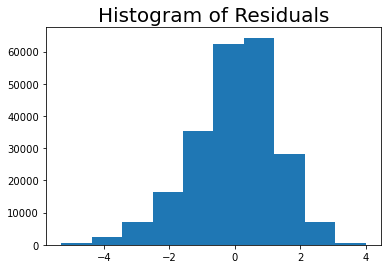

In [6]:
regress_fit = stats.linregress(merged["runtimeMinutes"], merged["averageRating"])
print(regress_fit)
residuals = merged["averageRating"] - ((regress_fit.slope * merged["runtimeMinutes"]) + regress_fit.intercept)
plt.hist(residuals)
plt.title('Histogram of Residuals', fontsize=20)
plt.show()

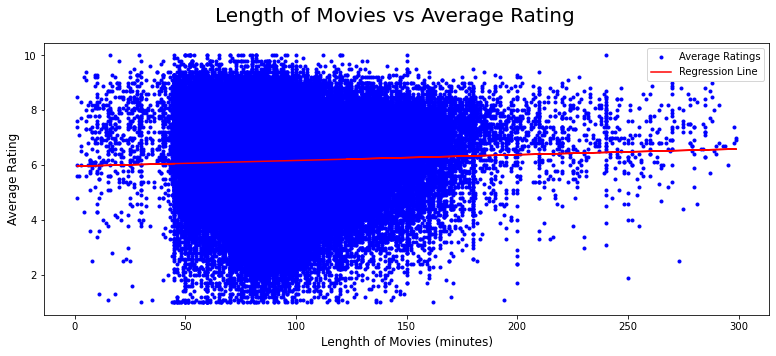

In [7]:
plt.figure(figsize=(13, 5))
plt.plot(merged["runtimeMinutes"], merged["averageRating"],"b.")
plt.plot(merged["runtimeMinutes"], ((regress_fit.slope * merged["runtimeMinutes"]) + regress_fit.intercept),"r-")

plt.suptitle("Length of Movies vs Average Rating", fontsize=20)
plt.xlabel("Lenghth of Movies (minutes)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.legend(['Average Ratings', 'Regression Line'])

plt.show()